In [1]:
pip install pandas scikit-learn tensorflow numpy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

### Read data from csv

In [3]:
dataset = pd.read_csv("C:/Users/User/Desktop/Machine Learning for AI/CA 2/BankRecords.csv")

In [4]:
dataset.head()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,3944,61,36,188,91360,1,9.3,Degree,0,Yes,No,No,No,No
1,1340,52,25,180,94545,2,9.0,Degree,297,Yes,No,No,Yes,No
2,3823,63,33,178,91768,4,9.0,Masters,0,Yes,No,No,No,No
3,10,34,9,180,93023,1,8.9,Masters,0,Yes,No,No,No,No
4,2989,46,21,205,95762,2,8.8,Diploma,181,No,Yes,No,Yes,No


In [5]:
# Sort the dataframe by 'Income(Thousands)' column in descending order
sorted_df = dataset.sort_values(by='Income(Thousands)', ascending=False)

# Print the sorted dataframe
print(sorted_df)


        ID  Age  Experience(Years)  Income(Thousands)  Sort Code  Family  \
165   3897   48                 24                224      93940       2   
166   4994   45                 21                218      91801       2   
199    527   26                  2                205      93106       1   
4     2989   46                 21                205      95762       2   
1044   678   46                 21                204      92780       2   
...    ...  ...                ...                ...        ...     ...   
4532   802   47                 23                  8      92612       4   
4533  2510   36                 11                  8      93401       4   
3811  1055   63                 38                  8      95136       4   
3637  1001   59                 35                  8      92691       4   
4739  1483   60                 35                  8      94143       1   

      Credit Score Education  Mortgage(Thousands's) Personal Loan  \
165       6.666667

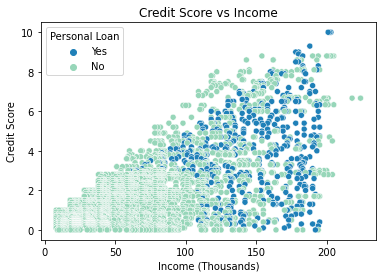

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Credit Score vs Income
sns.scatterplot(x='Income(Thousands)', y='Credit Score', data=dataset, hue='Personal Loan', palette='YlGnBu_r')
plt.title('Credit Score vs Income')
plt.xlabel('Income (Thousands)')
plt.ylabel('Credit Score')
plt.show()





## Loan Approval Analysis Report

### Income and Loan Approval Correlation

After analyzing the provided data, it is evident from the generated graph that individuals with a total income exceeding $100,000 are more likely to be approved for a loan compared to those earning below this threshold.

### Factors Influencing High Approval Rates

Upon further investigation, it was concluded that individuals with higher scores typically had a superior educational background or more years of experience. Interestingly, age did not play a significant role in loan approval rates. The highest scoring individuals were predominantly between the ages of 30 and 60.

### Summary

- **Income Influence**: Higher income (> $100,000) correlates with higher loan approval rates.
- **Education and Experience**: Better educational qualifications and more extensive work experience contribute to higher scores and increased approval likelihood.
- **Age Factor**: Age does not significantly impact loan approval, with top-scoring individuals ranging from 30 to 60 years old.

This analysis highlights the importance of income, education, and experience in loan approval processes, while age appears to be a less critical factor.

---

In [7]:
print(dataset.isnull().sum())

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('BankRecords.csv')

# Define categorical and numerical columns
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Define features (X) and target (y)
X = data.drop('Income(Thousands)', axis=1)
y = data['Income(Thousands)']

# The data is split into training and test sets. 80% of the data is used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Fit and transform the training data, then transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape)
print(X_test.shape)


(4000, 18)
(1000, 18)


The shapes of the transformed training and test sets are printed to verify the transformation. The output indicates that there are 4,000 samples in the training set and 1,000 samples in the test set, each with 18 features after preprocessing.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Function to create the neural network model
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(44, activation='relu'))
    model.add(Dense(22, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Assuming X_train, y_train, X_test, and y_test are already defined
input_shape = X_train.shape[1]

# Create the model
model = create_model(input_shape)

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=36, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Mean Absolute Error is: {mae}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                836       
                                                                 
 dense_1 (Dense)             (None, 22)                990       
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1849 (7.22 KB)
Trainable params: 1849 (7.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
89/89 [==============================] - 1s 4ms/step - loss: 6686.3105 - mae: 68.0060 - val_loss: 5445.4956 - val_mae: 58.3653
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 2845.1873 - mae: 39.6066 - val_loss: 1606.7831 - val_mae: 32.2335
Epoch 3/10

In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and test sets (assuming X_train, X_test, y_train, y_test are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
mae_linear_regressor = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Absolute Error is: {mae_linear_regressor}")

# Ridge Regression
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)
y_pred_ridge = ridge_regressor.predict(X_test)
mae_ridge_regressor = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Absolute Error is: {mae_ridge_regressor}")


Linear Regression Mean Absolute Error is: 25.373405667070312
Ridge Regression Mean Absolute Error is: 25.372991748252932


### Part 2.

### Semantic analysis

In [11]:
import nltk 

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

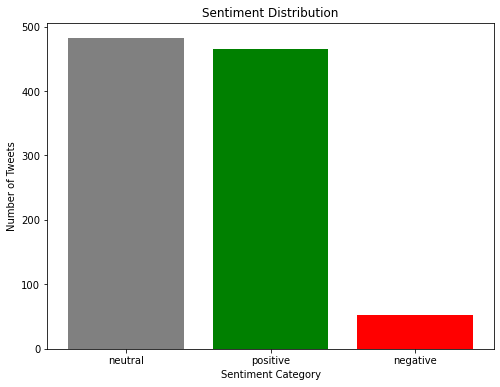

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Read the .csv file
df = pd.read_csv('C:/Users/User/Desktop/Machine Learning for AI/CA 2/SpaceX_Comments_database - TwCommentExport-SpaceX-1795463423066792387-2024-05-30_212409.csv')

# Apply sentiment analysis to each entry in the 'TweetText' column
df['sentiment_score'] = df['TweetText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment scores into negative, neutral, and positive
df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[-np.inf, -0.01, 0.01, np.inf], labels=['negative', 'neutral', 'positive'])

# Count the number of tweets in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Define colors for each sentiment category
colors = {'negative': 'red', 'neutral': 'gray', 'positive': 'green'}

# Plot sentiment scores in bars with different colors
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[x] for x in sentiment_counts.index])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.show()


https://www.youtube.com/watch?v=u7tX7IWVjbQ

https://www.youtube.com/watch?v=u7tX7IWVjbQ&ab_channel=PYTHONPARANEGOCIOS

https://www.youtube.com/watch?v=ObBAqzvL5RU&ab_channel=XTCodeTech